<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas Kelompok**
###**Dataset: *Craiglist Sales***
###**Kelompok: Kebodohan Artifisial**


*   Christian Raditya (1906292982)
*   Kevin Dharmawan (1906398515)
*   Zulfahri Haradi (1906398572)



###**Tenggat Waktu: 27 Desember 2021, 22.00 WIB**
</center>



# **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Kelompok Kebodohan Artifisial"
KELAS = "KASDD - B"
NPM = [
       '1906292982',
       '1906398515',
       '1906398572'
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
             'https://towardsdatascience.com/predicting-car-price-using-machine-learning-8d2df3898f16',
             'https://www.analyticsvidhya.com/blog/2021/07/car-price-prediction-machine-learning-vs-deep-learning/',
             'https://www.howellford.com/blogs/2529/everything-you-need-to-know-about-vin-numbers/',
]

In [ ]:
PERNYATAAN_INTEGRITAS = "Kami, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni kami kerjakan sendiri.\n\
Kami tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika kami melanggar pernyataan tersebut, kami siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Kami, Kelompok Kebodohan Artifisial dari kelas KASDD - B dengan NPM ['1906292982', '1906398515', '1906398572'], menyatakan bahwa seluruh jawaban pada pekerjaan ini murni kami kerjakan sendiri.
Kami tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika kami melanggar pernyataan tersebut, kami siap menerima konsekuensi apapun yang diberikan.
   (Kelompok Kebodohan Artifisial)


# Exploratory Data Analysis (EDA)

## Import Dataset dan Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from google.colab import drive

In [ ]:
# Import Dateset
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/Shareddrives/Kebodohan Artifisial/vehicles.csv')
drive.flush_and_unmount()

Mounted at /content/drive


## Informasi umum data

In [ ]:
# Mencetak dimensi data
print("data: ", dataset.shape)

data:  (426880, 26)


In [ ]:
# Membaca kolom-kolom pada DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## **Variable Descriptions**
`id`: Entry ID

`url`: URL dari penjualan mobil

`region`: Region dari craiglist

`region_url`: Link craiglist khusus region

`price`: Harga craiglist

`year`: Tahun craiglist dijual

`manufacturer`: Manufacturer dari mobil

`model`: Model kendaraan

`condition`: Kondisi dari kendaraan

`cylinders`: Jumlah cylinder kendaraan

`fuel`: Tipe bahan bakar yang digunakan (gas/listrik)

`odometer`: Jarak yang sudah ditempu kendaraan (miles)

`title_status`: Status kendaraan (clean/dll)

`transmission`: Tipe transmisi kendaraan 

`VIN`: *Vehicle Identification Number*

`drive`: Tipe penggerak kendaraan (4wd/ 2wd)

`size`: Ukuran kendaraan

`type`: Tipe bentuk mobil

`paint_color`: Warna kendaraan

`image_url`: URL gambar kendaraan

`description`: Deskripsi kendaraan

`county`: Column tidak berguna yang masuk secara tidak sengaja

`state`: Negara mobil tersebut dijual (States dalam US)

`lat`: Posisi latitude dari penjualan

`long`: Posisi Longitude dari penjualan 

`posting_date`: Tanggal penjualan dimulai

In [ ]:
dataset.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


### Ringkasan Statistik data

In [ ]:
dataset.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
# Menampilkan summary dari nonnumeric atribute
display(dataset.describe(include=np.object))

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://mendocino.craigslist.org/ctd/d/petalum...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


### Missing values

In [ ]:
# Missing value dari setiap column

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(dataset)

               Total   Percent
county        426880  1.000000
size          306361  0.717675
cylinders     177678  0.416225
condition     174104  0.407852
VIN           161042  0.377254
drive         130567  0.305863
paint_color   130203  0.305011
type           92858  0.217527
manufacturer   17646  0.041337
title_status    8242  0.019308
long            6549  0.015342
lat             6549  0.015342
model           5277  0.012362
odometer        4400  0.010307
fuel            3013  0.007058
transmission    2556  0.005988
year            1205  0.002823
description       70  0.000164
posting_date      68  0.000159
image_url         68  0.000159


### Duplicated Data

In [ ]:
# Jumlah baris duplikat
dataset.duplicated().sum()

0

### Outlier check

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


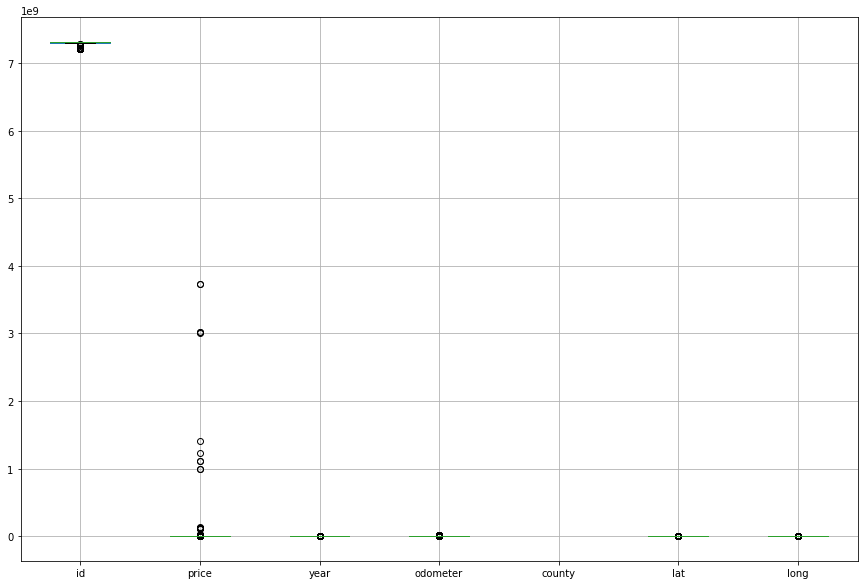

In [ ]:
dataset.boxplot(figsize=(15, 10))

Secara sekilas dapat terlihat terdapat banyak outlier pada atribut price.

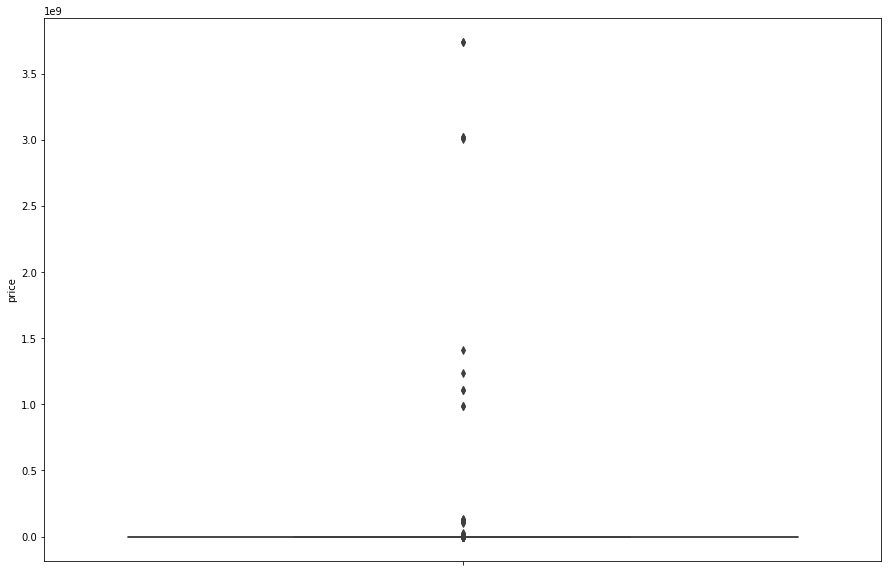

In [ ]:
sns.boxplot(y=dataset['price'])

In [ ]:
def outlier_check(df, percent_threshold = 10):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  feature_with_outlier = []
  try:
    is_outlier = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    for (columnName, columnData) in is_outlier.iteritems():
      outlier_percentage = is_outlier[is_outlier[columnName]==True].shape[0] / df.shape[0] * 100
      if outlier_percentage > percent_threshold:
        feature_with_outlier.append(columnName)
        print(f'{columnName}: {outlier_percentage:2f}%')
  except:
    pass # use try except to bypass NaN values

outlier_check(dataset, 0)

id: 0.010307%
lat: 1.502296%
long: 0.045680%
odometer: 1.027221%
price: 1.915527%
year: 3.723763%


Setelah dicek lebih dalam, jumlah outlier yang ada hanya pada 6 atribut dan persentase outliernya sangat kecil

### Visualisasi atribut kategorikal


In [ ]:
# fungsi untuk membuat countplot
def count_viz(df, category, ukuran=[12,10], rotate_xlabel = 0):
  import matplotlib.pyplot as plt
  import seaborn as sns
  plt.rcParams["figure.figsize"] = ukuran
  # return sns.countplot(x = category, data = df)
  ax = sns.countplot(x=category, data=df)
  if rotate_xlabel:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel, ha="right")
  plt.tight_layout()
  plt.show()

condition 	cylinders 	fuel 	title_status 	transmission	drive 	size 	type 	paint_color	state

In [ ]:
dataset.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

Pada fitur kategorikal banyak fitur yang memiliki tingkat unik tinggi, sehingga visualisasi hanya akan dilakukan pada atribut kategorikal yang memiliki jumlah unique kurang dari 100

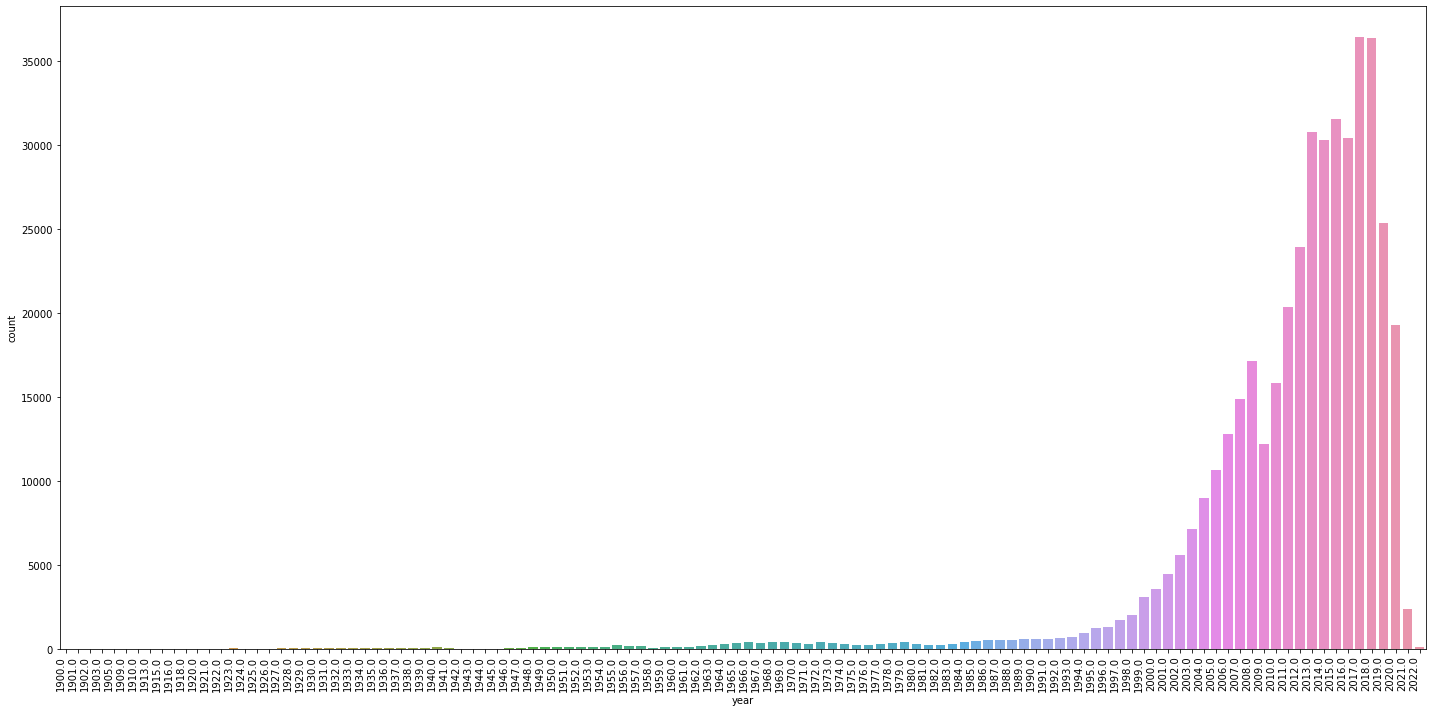

In [ ]:
count_viz(dataset, 'year', ukuran=[20, 10], rotate_xlabel=90)

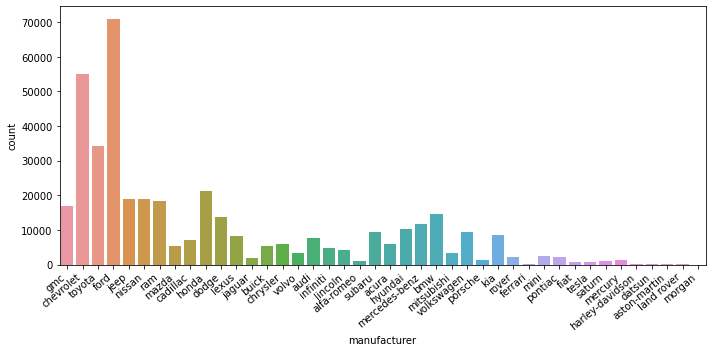

In [ ]:
count_viz(dataset, 'manufacturer', ukuran=[10, 5], rotate_xlabel = 40)

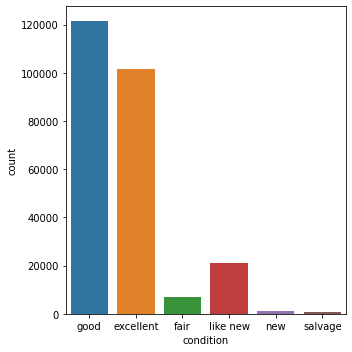

In [ ]:
count_viz(dataset, 'condition', ukuran=[5,5])

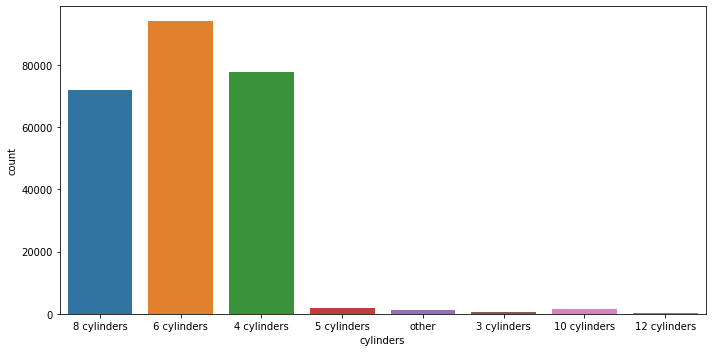

In [ ]:
count_viz(dataset, 'cylinders', ukuran = [10,5])

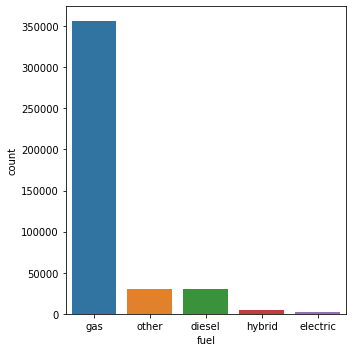

In [ ]:
count_viz(dataset, 'fuel', [5,5])

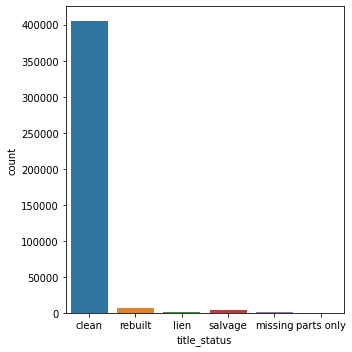

In [ ]:
count_viz(dataset, 'title_status', ukuran=[5, 5])

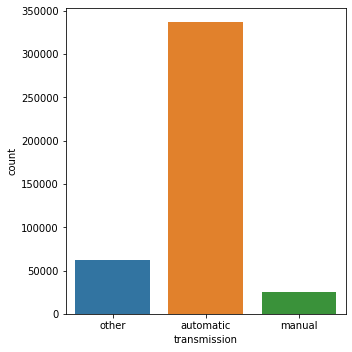

In [ ]:
count_viz(dataset, 'transmission', ukuran=[5, 5])

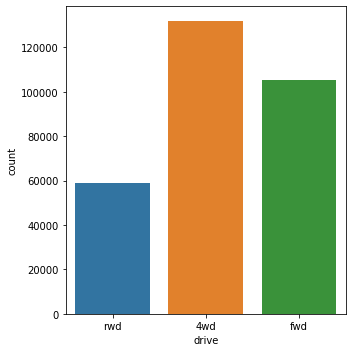

In [ ]:
count_viz(dataset, 'drive', ukuran=[5,5])

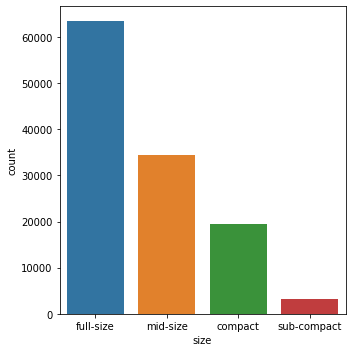

In [ ]:
count_viz(dataset, 'size', ukuran=[5,5])

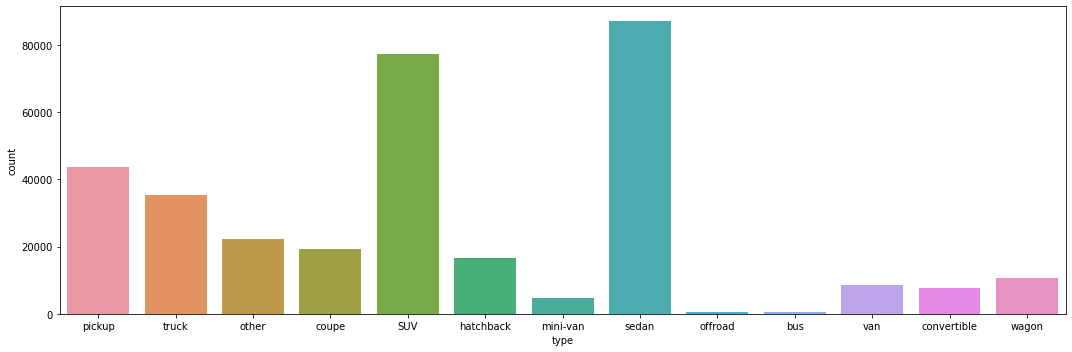

In [ ]:
count_viz(dataset, 'type', ukuran=[15,5])

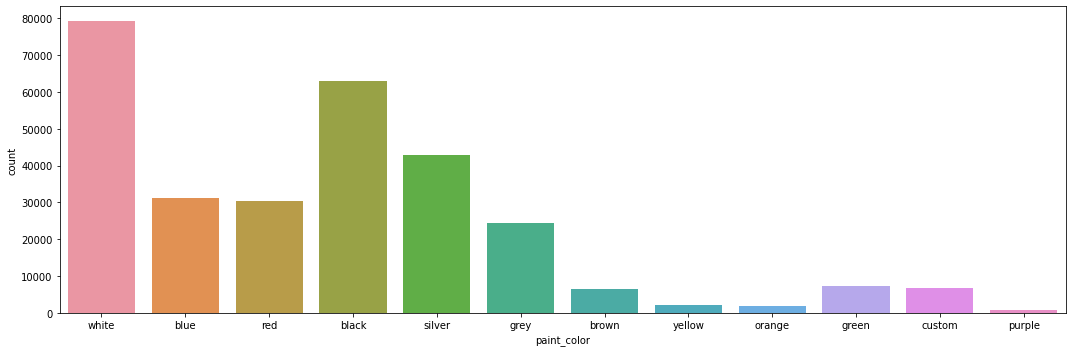

In [ ]:
count_viz(dataset, 'paint_color', ukuran=[15,5])

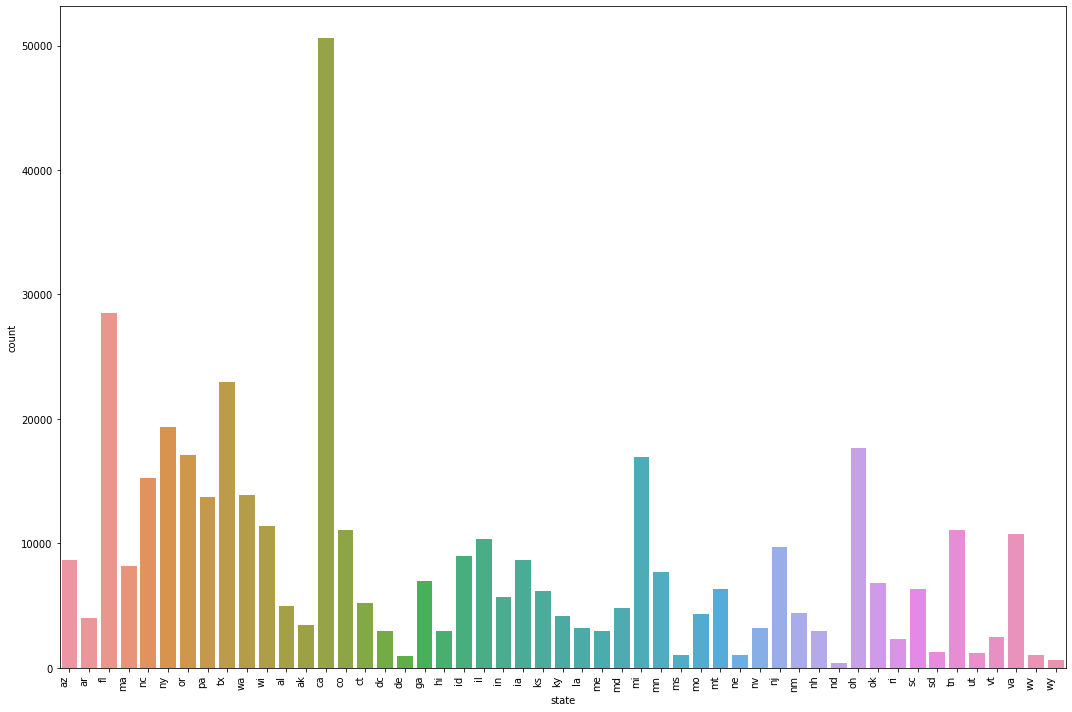

In [ ]:
count_viz(dataset, 'state', rotate_xlabel=90, ukuran=[15,10])

### Visualisasi atribut numerik

Text(0.5, 1.0, 'Correlation matrix')

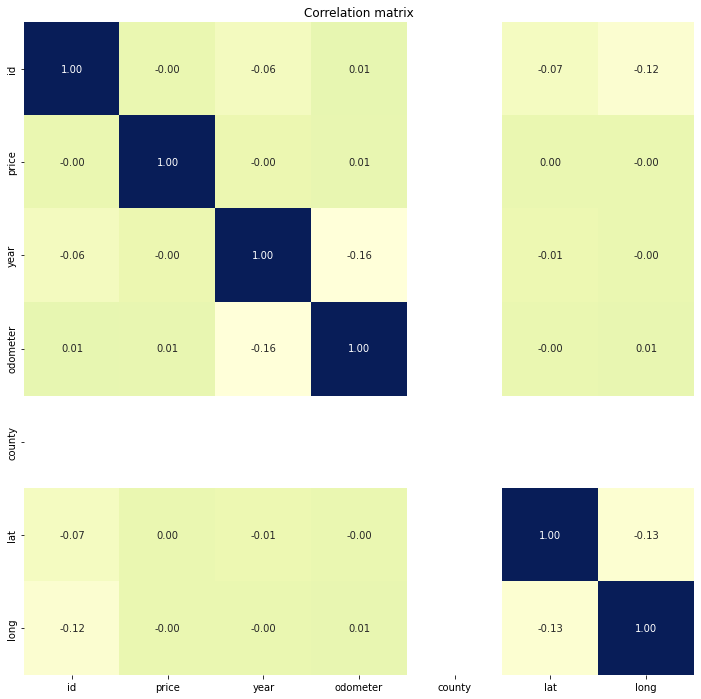

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.select_dtypes(np.number).corr(), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=dataset.select_dtypes(np.number).columns,
        yticklabels=dataset.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

### (2) Jenis kendaraan paling populer berdasarkan state

In [ ]:
def search_popular(df, attribute):
    print(f"{attribute.title()}: {df[attribute].value_counts()[:1].index.tolist()[0]}")

In [ ]:
states = dataset['state'].unique().tolist()
attributes = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']

for state in states:
    data_in_state = dataset.loc[dataset['state'] == state]
    print(f"States: {state}")
    for item in attributes:
        search_popular(data_in_state, item)
    print()

States: az
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: fwd
Size: full-size
Type: sedan
Paint_Color: white

States: ar
Manufacturer: chevrolet
Model: silverado 1500
Fuel: gas
Transmission: automatic
Drive: 4wd
Size: full-size
Type: pickup
Paint_Color: white

States: fl
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: fwd
Size: full-size
Type: sedan
Paint_Color: white

States: ma
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: 4wd
Size: full-size
Type: sedan
Paint_Color: black

States: nc
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: 4wd
Size: full-size
Type: sedan
Paint_Color: white

States: ny
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: 4wd
Size: full-size
Type: sedan
Paint_Color: black

States: or
Manufacturer: ford
Model: f-150
Fuel: gas
Transmission: automatic
Drive: 4wd
Size: full-size
Type: SUV
Paint_Color: white

States: pa
Manufacturer: ford
Model

### (3) State paling sering menggunakan mobil

In [ ]:
dataset.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
from datetime import date

states = dataset['state'].unique().tolist()
states_with_result = {}

for state in states:
    data_in_state = dataset.loc[dataset['state'] == state][~dataset['year'].isna()][~dataset['year'].isna()]

    mean_odometer = data_in_state['odometer'].mean()
    mean_year = data_in_state['year'].mean()

    count = len(data_in_state)
    mean_age = date.today().year - mean_year

    states_with_result[state] = mean_odometer / mean_age

for state in sorted(states_with_result, key=states_with_result.get, reverse=True):
    print('%s: %.5f miles / yr' % (state, states_with_result[state]))

al: 14746.37146 miles / yr
tx: 11774.86681 miles / yr
mi: 11771.43884 miles / yr
nd: 11275.72459 miles / yr
ar: 11092.94201 miles / yr
mo: 10979.65896 miles / yr
tn: 10887.55836 miles / yr
mn: 10886.98455 miles / yr
id: 10754.49618 miles / yr
ks: 10708.39362 miles / yr
fl: 10706.16767 miles / yr
ok: 10579.37172 miles / yr
nc: 10577.28018 miles / yr
va: 10444.37562 miles / yr
vt: 10299.34372 miles / yr
ms: 10271.13435 miles / yr
ut: 10177.85250 miles / yr
ky: 10159.00715 miles / yr
ga: 10147.55473 miles / yr
in: 10114.22614 miles / yr
dc: 10081.87091 miles / yr
ia: 10035.43025 miles / yr
mt: 10002.40887 miles / yr
me: 9997.49419 miles / yr
or: 9922.36655 miles / yr
wa: 9920.36463 miles / yr
nh: 9890.19149 miles / yr
sd: 9817.62619 miles / yr
co: 9807.40783 miles / yr
ne: 9788.04169 miles / yr
nj: 9743.36319 miles / yr
ma: 9714.26715 miles / yr
la: 9696.03003 miles / yr
wi: 9680.84989 miles / yr
oh: 9673.23118 miles / yr
ri: 9587.48800 miles / yr
nm: 9529.08507 miles / yr
il: 9504.98333 

### (4) State yang paling banyak memposting iklan

In [ ]:
states = dataset['state'].unique().tolist()

state_with_ads = {}

for state in states:
    data_in_state = dataset.loc[dataset['state'] == state]
    state_with_ads[state] = len(data_in_state)

for state in sorted(state_with_ads, key=state_with_ads.get, reverse=True):
    print('%s: %d ads' % (state, state_with_ads[state]))

ca: 50614 ads
fl: 28511 ads
tx: 22945 ads
ny: 19386 ads
oh: 17696 ads
or: 17104 ads
mi: 16900 ads
nc: 15277 ads
wa: 13861 ads
pa: 13753 ads
wi: 11398 ads
co: 11088 ads
tn: 11066 ads
va: 10732 ads
il: 10387 ads
nj: 9742 ads
id: 8961 ads
az: 8679 ads
ia: 8632 ads
ma: 8174 ads
mn: 7716 ads
ga: 7003 ads
ok: 6792 ads
sc: 6327 ads
mt: 6294 ads
ks: 6209 ads
in: 5704 ads
ct: 5188 ads
al: 4955 ads
md: 4778 ads
nm: 4425 ads
mo: 4293 ads
ky: 4149 ads
ar: 4038 ads
ak: 3474 ads
la: 3196 ads
nv: 3194 ads
nh: 2981 ads
dc: 2970 ads
me: 2966 ads
hi: 2964 ads
vt: 2513 ads
ri: 2320 ads
sd: 1302 ads
ut: 1150 ads
wv: 1052 ads
ne: 1036 ads
ms: 1016 ads
de: 949 ads
wy: 610 ads
nd: 410 ads


# Preprocessing Data

### Penanganan Data

#### Duplicated Data

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
print(dataset.duplicated(subset=['VIN']).sum())
print(dataset.duplicated(subset=['VIN', 'manufacturer']).sum())
print(dataset.duplicated(subset=['VIN', 'manufacturer', 'model']).sum())
print(dataset.duplicated(subset=['VIN', 'manufacturer', 'model', 'year']).sum())
print(dataset.duplicated(subset=['VIN', 'price']).sum())

308615
308461
288405
264655
297021


In [ ]:
clean_dataset = dataset.copy()

In [ ]:
clean_dataset = clean_dataset.dropna(subset=['VIN'])

# Memberi flag pada baris yang akan didrop sesuai kriteria pada penjelasan
clean_dataset['drop'] = clean_dataset.duplicated(subset=['VIN']) & ~clean_dataset.duplicated(subset=['VIN', 'year', 'manufacturer'])

# Melakukan drop baris
clean_dataset.drop(clean_dataset[clean_dataset['drop'] == True].index, inplace=True)

# Drop kolom flag
clean_dataset = clean_dataset.drop(['drop'], axis=1)

Walaupun tidak ada duplikasi data pada keseluruhan kolom, ternyata terdapat duplikasi VIN yang merupakan kode identifikasi kendaraan yang unik.

Sumber: https://www.howellford.com/blogs/2529/everything-you-need-to-know-about-vin-numbers/

Kemungkinan hal ini terjadi karena mobil yang sama dijual lebih dari satu kali. Ada pula kemungkinan adanya scam karena seharusnya mobil dengan `VIN` yang sama, seharusnya memiliki `manufacturer`, `model`, dan `year` yang sama. Namun, cukup banyak model yang tertulis berbeda karena kelengkapan, salah satunya yang dapat ditemukan adalah "3500 dually 5.9l 6-sp" ditulis hanya "3500". Oleh karena itu, kami melakukan drop pada `VIN` yang terduplikat, tetapi memiliki `manufacturer` dan `year` yang berbeda karena kemungkinan besar ini adalah scam dengan dropna pada kolom `VIN` terlebih dahulu.

#### (1) Drop County Column

In [ ]:
clean_dataset = clean_dataset.drop(['county'], axis=1)

#### Irrelevant Column

In [ ]:
display(clean_dataset.describe(include=np.object))

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,265652,265652,265652,257958,264016,151286,145829,262770,257546,263195,265652,193813,52363,237856,196744,265652,265651,265652,265652
unique,265652,404,413,41,18069,6,8,5,6,3,118264,3,4,13,12,124243,232302,51,233148
top,https://bozeman.craigslist.org/ctd/d/coeur-ale...,salem,https://salem.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Call or text today to find out more. (602) 620...,ca,2021-04-23T22:13:05-0400
freq,1,2618,2618,42871,5490,88294,58110,211548,254337,192675,261,88851,29170,59905,55517,7357,197,33506,12


In [ ]:
clean_dataset = clean_dataset.drop(['id', 'url', 'VIN', 'image_url', 'description', 'posting_date', 'region', 'region_url', 'lat', 'long'], axis=1)

Drop kolom `id` dan `url` karena merupakan kolom identifier. Drop kolom `image_url`, `VIN`, `description` dan `posting_date` karena nilai unique terlalu banyak. Drop kolom `region`, `region_url`, `lat`, dan `long` karena kolom tersebut bersamaan dengan `state` adalah kolom-kolom yang menandakan lokasi. Disisakan `state` karena peraturan perpajakan yang mungkin dapat mempengaruhi harga diatur dalam lingkup `state` dan `region` mengikuti peraturan milik `state`.

#### Missing Value

In [ ]:
cek_null(clean_dataset)

               Total   Percent
size          213289  0.802889
cylinders     119823  0.451053
condition     114366  0.430511
drive          71839  0.270425
paint_color    68908  0.259392
type           27796  0.104633
title_status    8106  0.030514
manufacturer    7694  0.028963
fuel            2882  0.010849
odometer        2681  0.010092
transmission    2457  0.009249
model           1636  0.006158
year            1133  0.004265


In [ ]:
clean_dataset = clean_dataset.drop(['size'], axis=1)

Drop kolom `size` karena baris dengan nilai `size` null terlalu besar (>80%).

In [ ]:
clean_dataset = clean_dataset.dropna()
clean_dataset.shape

(60929, 14)

Jumlah data sudah sangat besar dan pada beberapa kolom, jumlah baris yang mengandung null cukup besar walaupun tidak sebesar kolom `size`, sehingga kami memilih untuk drop semua baris yang mengandung nilai null agar tidak membuat data yang "terlalu fiktif". Dapat dilihat juga setelah didrop, masih terdapat lebih dari 60 ribu baris data.

#### Outlier

In [ ]:
lower_limit = np.percentile(clean_dataset[['price']], 5)
upper_limit = np.percentile(clean_dataset[['price']], 95)
print(lower_limit, upper_limit)

0.0 41990.0


In [ ]:
clean_dataset = clean_dataset[(clean_dataset['price'] > lower_limit) & (clean_dataset['price'] < upper_limit)]
clean_dataset.shape

(54743, 14)

Dapat dilihat bahwa persentil ke-5 memiliki nilai sangat kecil, yaitu 0. Kami menilai data ini sebagai scam. Semisal bukan scam pun data ini tidak relevan untuk mesin kami yang tugas utamanya adalah memprediksi harga barang.

### Normalisasi Data

In [ ]:
clean_dataset['year'] = (2021 - clean_dataset['year']).astype(int)
clean_dataset['odometer'] = clean_dataset['odometer'] // 5000
clean_dataset['odometer'] = clean_dataset['odometer'].astype(int)

Kami mengubah kolom `year` yang awalnya berisi tahun produksi menjadi umur dari mobil tersebut dihitung dari tahun saat pengerjaan (2021) untuk memperkecil data. Selain itu, kami mengubah nilai `odometer` menjadi kelipatan 5000 terdekat karena biasanya, `odometer` dilihat per 5000 satuan jarak tempuh.

In [ ]:
display(clean_dataset.describe(include=np.object))

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
count,54743,54743,54743,54743,54743,54743,54743,54743,54743,54743,54743
unique,40,6056,6,8,5,6,3,3,13,12,51
top,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,sedan,white,ca
freq,9347,856,25740,21593,50312,53328,41166,23948,14162,14066,6135


In [ ]:
clean_dataset = clean_dataset.drop(['model', 'state'], axis=1)

In [ ]:
dummies_dataset = pd.get_dummies(clean_dataset, columns=['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color'])

from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dummies_dataset, test_size=0.2)

In [ ]:
test_actual = test_dataset['price']

# Melakukan Prediksi

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

In [ ]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [ ]:
def calculate_metrics(y_test, y_pred, verbose=False):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    cod = r2_score(y_test, y_pred)

    if verbose:
        print('Mean Squared Error (MSE): %.5f' % mse)
        print('Mean Absolute Error (MAE): %.5f' % mae)
        print('Root Mean Squared Error (RMSE): %.5f' % rmse)
        print('Coefficient of Determination (R Square): %.5f' % cod)

    return [mse, mae, rmse, cod]

In [ ]:
def try_model(model, x_train, y_train, x_test, y_test, verbose=False, verbose_training=False):
    model.fit(x_train, y_train)

    if verbose_training:
        print('Train metrics:')

        pred = model.predict(x_train)
        calculate_metrics(y_train, pred, verbose)

        print()

    if verbose:
        print('Test metrics:')

    pred = model.predict(x_test)
    return calculate_metrics(y_test, pred, verbose)

In [ ]:
def find_best_model(models, x_train, y_train, x_test, y_test, verbose=False, verbose_training=False):
    best_score = (-1, -1, -1, -1)
    best_model = None

    for model in models:
        current_score = try_model(model, x_train, y_train, x_test, y_test, verbose, verbose_training)

        if current_score[3] > best_score[3]:
            best_score = current_score
            best_model = model

    return best_model, best_score

## Harga kendaraan bekas dengan tipe tertentu

In [ ]:
train_dataset.head()

,price,year,odometer,type,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,...,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
370278,5995,9,22,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
157483,19500,4,14,sedan,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
253239,9995,7,14,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
115347,4000,11,52,hatchback,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
144208,15000,4,4,hatchback,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
types = ['SUV', 'other', 'sedan', 'hatchback', 'wagon', 'coupe', 'van', 'convertible', 'truck', 'mini-van', 'pickup', 'bus', 'offroad']
predictor = dict()

print('{:<15} {:<50} {:<7}'.format('Type', 'Model', 'Score'))

for car_type in types:
    models = [LinearRegression(), Lasso(alpha=1e-5), Ridge(), RandomForestRegressor(), ExtraTreesRegressor(), BaggingRegressor(), MLPRegressor(random_state=1, max_iter=100)]
    df_type = train_dataset[train_dataset['type'] == car_type].drop(['type'], axis=1)

    y_type = df_type['price']
    x_type = df_type.drop(['price'], axis=1)

    x_train, x_validate, y_train, y_validate = train_test_split(x_type, y_type, test_size=0.2)

    model = find_best_model(models, x_train, y_train, x_validate, y_validate)
    predictor[car_type] = model
    print('{:<15} {:<50} {:.5f}'.format(car_type, str(model[0]), model[1][3]))

Type            Model                                              Score  
SUV             ExtraTreesRegressor()                              0.88331
other           RandomForestRegressor()                            0.93668
sedan           ExtraTreesRegressor()                              0.92496
hatchback       ExtraTreesRegressor()                              0.80592
wagon           ExtraTreesRegressor()                              0.90530
coupe           ExtraTreesRegressor()                              0.93389
van             RandomForestRegressor()                            0.92673
convertible     RandomForestRegressor()                            0.84277
truck           ExtraTreesRegressor()                              0.88640
mini-van        RandomForestRegressor()                            0.73434
pickup          ExtraTreesRegressor()                              0.93167
bus             ExtraTreesRegressor()                              0.83429
offroad         ExtraTree

In [ ]:
def price_predict_row(row):
    car_type = row['type']
    row_x = row.drop(['type']).to_numpy()
    return predictor[car_type][0].predict([row_x])

In [ ]:
def price_predict(df):
    predictions = [] # nanti ganti jadi dataframe buat diappend ke df

    for index, row in df.iterrows():
        prediction = price_predict_row(row)
        predictions.append(prediction[0])

    df['prediction'] = predictions
    return df

In [ ]:
test_predictor = test_dataset.drop(['price'], axis=1)
price_prediction = price_predict(test_predictor.copy())

In [ ]:
calculate_metrics(test_actual, price_prediction['prediction'], verbose=True)

Mean Squared Error (MSE): 8831761.65270
Mean Absolute Error (MAE): 1367.81452
Root Mean Squared Error (RMSE): 2971.82800
Coefficient of Determination (R Square): 0.93218


[8831761.652702292, 1367.8145199001317, 2971.827998505683, 0.9321804562843108]

## Iklan Palsu/Fraud

### Fraud Prediction Logic

Prediksi diawali dengan prediksi harga berdasarkan informasi yang diberikan. Lalu, hasil prediksi tersebut dibandingkan dengan harga yang diinput. Jika perbedaan cukup besar berdasarkan threshold tertentu, maka harga tersebut dianggap fraud.


Rumus perbedaan:
> BA (Batas Atas) = Prediksi + MAE
>
> BB (Batas Bawah) = Prediksi - MAE

Jika input berada di atas BA:
> (Input - BA) / Prediksi = Perbedaan

Jika input berada di bawah BA:
> (BB - Input) / Prediksi = Perbedaan

Jika input berada diantara BA dan BB, maka dianggap bukan fraud.

### Building Fraud Prediction using Price Prediction

In [ ]:
# Jika gap melebihi FRAUD_THRESHOLD, maka dianggap fraud
FRAUD_THRESHOLD = 0.1

def fraud_predict_row(row):
    input_price = row['price']
    price_predictor = row.drop(['price'])
    price_prediction = price_predict_row(price_predictor)

    prediction_error = predictor[row['type']][1][1] # MAE
    upper_prediction = price_prediction + prediction_error
    lower_prediction = price_prediction - prediction_error

    if input_price > upper_prediction:
        if (input_price - upper_prediction) / price_prediction > FRAUD_THRESHOLD:
            return True

    elif input_price < lower_prediction:
        if (lower_prediction - input_price) / price_prediction > FRAUD_THRESHOLD:
            return True

    return False

In [ ]:
def fraud_predict(df):
    predictions = []

    for index, row in df.iterrows():
        prediction = fraud_predict_row(row)
        predictions.append(prediction)

    df['fraud_prediction'] = predictions
    return df

In [ ]:
fraud_prediction = fraud_predict(test_dataset.copy())

In [ ]:
fraud_prediction[fraud_prediction['fraud_prediction'] == True].head(10)

,price,year,odometer,type,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,...,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,fraud_prediction
177802,29969,5,17,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True
171099,4588,18,26,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
261209,32260,2,2,other,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
6036,17999,10,19,SUV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True
58761,5900,15,39,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,True
310410,22997,7,24,truck,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True
147438,1300,14,35,SUV,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,True
408214,5677,17,67,van,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,True
6995,37750,2,2,SUV,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True
361466,41375,4,20,truck,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True


In [ ]:
fraud_prediction[fraud_prediction['fraud_prediction'] == False].head(10)

,price,year,odometer,type,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,...,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,fraud_prediction
32953,31590,1,6,other,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,False
269179,34995,5,5,van,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,False
369047,34990,2,2,van,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False
186007,3700,19,31,sedan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,False
64361,13222,7,20,coupe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,False
416477,37990,2,0,coupe,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,False
202338,22997,6,20,pickup,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False
407902,8490,12,17,hatchback,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False
293928,28318,1,5,mini-van,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False
174760,33990,3,4,pickup,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False


In [ ]:
count_true = len(fraud_prediction[fraud_prediction['fraud_prediction'] == True])
count_false = len(fraud_prediction[fraud_prediction['fraud_prediction'] == False])

print('Fraud Prediction %d True : %d False' % (count_true, count_false))

Fraud Prediction 1813 True : 9136 False


# Analisis Hasil Prediksi

Menurut kami, stakeholder yang paling terbantu adalah pembeli. Pembeli dapat menentukan mana harga yang kira-kira masuk akal karena terlalu tinggi dan tidak terlalu terlena dengan harga yang murah

Kesulitan membangun model:
1. Outlier mempengaruhi kualitas dari model yang buat
2. Kesulitan menentukan fitur yang relevan sebagai prediktor
3. Data yang 	terlalu sedikit untuk tipe bus dan offroad membuat hasil inkonsisten
4. Waktu eksekusi yang sangat lama hingga bahkan membuat mesin crash


Kesimpulan kami adalah banyak hambatan yang ada saat melakukan analisis data. Oleh karena itu, sifat eksploratif diperlukan oleh seorang peneliti. Analisis data juga merupakan proses iteratif, sehingga adanya kebutuhan untuk terus mengembangkan model yang sudah dibuat.